<a href="https://colab.research.google.com/github/Jerry0209/FundamentalLearningEPFL/blob/main/HW1/crack_the_code_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1: crack Alex's phone code

### Rules:
 - You should write the solution in this notebook and upload the completed notebook on Moodle by the deadline.
 - You are not allowed to work in groups, every student should submit their own notebook. If you submit two highly overlapping notebooks with another student, you will both be penalized.
 - The bonus questions are optional. They are not needed to get the full grade, but they can help you to get a higher grade.

### The setting

Your friend Alex wants to hide a secret code in a probability distribution. The probability density function is a piecewise linear distribution with parameters $0<a\le b$, defined as
$$p(x;a,b) = H(a,b) \begin{cases} \frac{x}{a} & \text{if } 0 \leq x \leq a, \\ \frac{b-x}{b-a} & \text{if } a \leq x \leq b, \\ 0 & \text{otherwise.} \end{cases}$$
where $H(a,b)$ is a normalization constant. Alex has choosen $a$ and $b$ such that they are the first two and the last two digits of his phone secret code, respectively.
For example, if their secret code is 1234, then $a=12$ and $b=34$. Alex stores some sample values of the distribution in a file called on their computer, thinking that nobody will be able to understand the distribution without the secret code.

You recently enrolled at EPFL and you are taking the course of _Fundamental of Inference and Learning_, and you want to prove that Alex's phone code is not safe. In this problem, your goal is to discover the secret code by studying the distribution.

## Part 1: Properties of the distribution

The distribution $p(x;a,b)$ is a valid distribution, i.e., it is normalized and it is non-negative. In this part, you will find many properties of the distribution.

 - **Question 1.** Find the normalization constant $H(a,b)$.
 - **Q1 Answer**
    - Since $p(x; a, b)$ is a valid probability density function, its integral over its entire domain must be 1.
    $$\int_{-\infty}^{\infty} p(x; a, b) dx = 1$$

    - Since PDF only has values in $[0, b]$, the integral can be written as:

    $$\int_{0}^{b} p(x; a, b)dx=\int_{0}^{a} H(a, b) \frac{x}{a} dx + \int_{a}^{b} H(a, b) \frac{b-x}{b-a} dx =H(a, b) \left[ \int_{0}^{a} \frac{x}{a}  dx + \int_{a}^{b} \frac{b-x}{b-a} dx \right]= 1$$

    - These two integrals can be calculated separately:
      - First integral:
    $$\int_{0}^{a} \frac{x}{a} dx = \frac{1}{a} \left[ \frac{x^2}{2} \right]_{0}^{a} = \frac{1}{a} \left( \frac{a^2}{2} - 0 \right) = \frac{a}{2}$$
      - Second integral:

    $$\int_{a}^{b} \frac{b-x}{b-a} dx = \frac{1}{b-a} \left[ bx - \frac{x^2}{2} \right]_{a}^{b}= \frac{1}{b-a} \left[ \left( b^2 - \frac{b^2}{2} \right) - \left( ab - \frac{a^2}{2} \right) \right]= \frac{1}{b-a} \left[ \frac{(b-a)^2}{2} \right] = \frac{b-a}{2}$$


      - Substitute these two results back into the original equation:

    $$H(a, b) \left[ \frac{a}{2} + \frac{b-a}{2} \right] = H(a, b) \left[ \frac{b}{2} \right] = 1$$
      - Solve for $H(a, b)$:
    $$H(a, b) = \frac{2}{b}$$




- **Question 2.** Compute the expected value $\mu$ of the distribution.
- **Q2 Answer**

  - The formula for the expected value $\mu$ ($\mathit{E}[X]$) is:
  $$\mu = \mathit{E}[X] = \int_{-\infty}^{\infty} x \cdot p(x; a, b) \, dx = \int_{0}^{a} x \left( \frac{2x}{ab} \right) \, dx + \int_{a}^{b} x \left( \frac{2(b-x)}{b(b-a)} \right) \, dx$$

  - Integral of two parts:


    - First integral
  $$\int_{0}^{a} \frac{2x^2}{ab} \, dx = \frac{2}{ab} \int_{0}^{a} x^2 \, dx= \frac{2}{ab} \left[ \frac{x^3}{3} \right]_{0}^{a} = \frac{2}{ab} \left( \frac{a^3}{3} - 0 \right) = \frac{2a^3}{3ab}= \frac{2a^2}{3b}$$


    - Second integral
  $$\int_{a}^{b} \frac{2x(b-x)}{b(b-a)} \, dx = \frac{2}{b(b-a)} \int_{a}^{b} (bx - x^2) \, dx= \frac{2}{b(b-a)} \left[ \frac{bx^2}{2} - \frac{x^3}{3} \right]_{a}^{b}$$

  $$= \frac{2}{b(b-a)} \left[ \left( \frac{b(b^2)}{2} - \frac{b^3}{3} \right) - \left( \frac{b(a^2)}{2} - \frac{a^3}{3} \right) \right]= \frac{b^2 + ab - 2a^2}{3b}$$


    - Combine the two results:
  $$\mu = \frac{2a^2}{3b} + \frac{b^2 + ab - 2a^2}{3b}= \frac{2a^2 + b^2 + ab - 2a^2}{3b}= \frac{a+b}{3}$$

    - Thus the expected value $\mu$ is $\frac{a+b}{3}$.

- **Question 3.** Compute the _cumulative density function_ $F(t)$ of the distribution.

- **Q3 Answer**

  - The Cumulative Distribution Function (CDF) $F(t)$ is defined as $F(t)  = \int_{-\infty}^{t} p(x;a,b) \, dx$.

  - Since the PDF is piecewise function, CDF should be calculated based on each piecewise function, which depends on different values of $t$:

  - **Case 1: $t < 0$**
  $$F(t) = \int_{-\infty}^{t} 0 \, dx = 0$$

  - **Case 2: $0 \le t \le a$**
  $$F(t) = \int_{-\infty}^{0} 0 \, dx + \int_{0}^{t} \frac{2x}{ab} \, dx= \frac{t^2}{ab}$$


  - **Case 3: $a \le t \le b$**

  $$F(t) = \int_{0}^{a} p(x) \, dx + \int_{a}^{t} p(x) \, dx = F(a) + \int_{a}^{t} \frac{2(b-x)}{b(b-a)} \, dx = \frac{a}{b} + \frac{2}{b(b-a)} \int_{a}^{t} (b-x) \, dx = \frac{2 b t - a b - t ^ { 2 }}{b(b-a)}$$

  - CDF is the total probability for $x$ on $[0, a]$, and add the probability for $x$ from $a$ to $t$.

  - When $t=a$, $F(a) = 1 - \frac{(b-a)^2}{b(b-a)} = 1 - \frac{b-a}{b} = \frac{a}{b}$. When $t=b$, $F(b) = 1 - 0 = 1$. Both match expectations.)

  - Final CDF is
  $$F(t) = \begin{cases} \frac{t^2}{ab} & \text{if } 0 \leq t \leq a, \\ \frac{2 b t - a b - t ^ { 2 }}{b(b-a)} & \text{if } a \leq t \leq b, \\ 0 & \text{otherwise} \end{cases}$$

* **Question 4.** Compute the median $m$ of the distribution. (Be careful, there are some special cases to consider according to the value $a$ and $b$)

- **Q4 Answer**

    - The median $m$ : $F(m) = \frac{1}{2}$. It's required to determine which segment of the CDF contains the $\frac{1}{2}$ probability value.

    - Test the value of the CDF at the breakpoint(peak) $x=a$:
    $$F(a) = \frac{a^2}{ab} = \frac{a}{b}$$.


    - **Case 1: $F(a) \ge \frac{1}{2}\implies\frac{a}{b} \ge \frac{1}{2} \implies 2a \ge b$**
      - The median $m$ must be in the first interval, $[0, a]$.
      - Use the CDF formula for this interval:
      $$F(m) = \frac{m^2}{ab} = \frac{1}{2}$$
      - Solving for $m$:
      $$m^2 = \frac{ab}{2}$$
      $$m = \sqrt{\frac{ab}{2}} \quad \text{(Take the positive root since } m \ge 0 \text{)}$$

  - **Case 2: $F(a) < \frac{1}{2}\implies\frac{a}{b} < \frac{1}{2} \implies 2a < b$**
    - The median $m$ must be in the second interval, $[a, b]$.
    - For this interval, we use the CDF formula $F(t) = \frac{2bt - ab - t^2}{b(b-a)}$.
    - Set $F(m) = \frac{1}{2}$:
    $$\frac{2bm - ab - m^2}{b(b-a)} = \frac{1}{2}$$
    - Rearrange it into a quadratic equation:
    $$2(2bm - ab - m^2) = b(b-a)$$
    $$2m^2 - 4bm + (ab + b^2) = 0$$

    - Solve this for $m$ using the quadratic formula, $m = \frac{-B \pm \sqrt{B^2 - 4AC}}{2A}$, with: $A = 2$, $B = -4b$, $C = (ab + b^2)$

    $$m = \frac{-(-4b) \pm \sqrt{(-4b)^2 - 4(2)(ab + b^2)}}{2(2)}$$
    $$m = \frac{4b \pm \sqrt{16b^2 - 8(ab + b^2)}}{4}$$


    $$m = b \pm \sqrt{\frac{2b(b-a)}{4}} = b \pm \sqrt{\frac{b(b-a)}{2}}$$
    - This gives two potential solutions. However, $m$ must be in the interval $[a, b]$, so $m \le b$.
    - The solution $m = b + \sqrt{\frac{b(b-a)}{2}}$ is "out of range" because it will be greater than $b$.
    - Therefore, only take the negative sign:
    $$m = b - \sqrt{\frac{b(b-a)}{2}}$$

    - By combining both cases, the complete solution for the median is:
  $$m = \begin{cases} \sqrt{\frac{ab}{2}} & \text{if } 2a \ge b \\ b - \sqrt{\frac{b(b-a)}{2}} & \text{if } 2a < b \end{cases}$$

- **Question 5.** Are the expected value and the median equal? How do the compare with the mode of the distribution? Comment the results.

- **Q5 Answer**

  - The mode is the value of $x$ where the PDF $p(x)$ reaches its maximum.
    - On $[0, a]$, $p(x) = \frac{2x}{ab}$ is an increasing function.
    - On $[a, b]$, $p(x) = \frac{2(b-x)}{b(b-a)}$ is a decreasing function.
    - The PDF reaches its peak at $x=a$, with $p(a) = \frac{2a}{ab} = \frac{2}{b}$.
    - Therefore, the Mode $= a$.

  - The mean, median, and mode are equal only when the distribution is symmetric ($b=2a$). When the distribution is asymmetric or skewed, they are different. The mean is always pulled in the direction of the long tail, while the mode remains at the peak, and the median lies between the two.

  - Details for each case are in the table below.

| Case | Condition | Distribution Shape | Mode | Mean | Median | Relationship | Commentary |
|------|-----------|-------------------|------|------|--------|--------------|------------|
| **Case 1** | $a = \frac{b}{2}$ ($b = 2a$) | Symmetric (isosceles triangle) | $a$ | $\frac{a+b}{3} = a$ | $m = \sqrt{\frac{ab}{2}} = a$ | **Mean = Median = Mode** | All three measures coincide at the peak. This is characteristic of a unimodal symmetric distribution. |
| **Case 2** | $a > \frac{b}{2}$ ($b < 2a$) | Left-skewed (longer tail on left) | $a$ | $\frac{a+b}{3} < a$ | $m = \sqrt{\frac{ab}{2}}$ | **Mean < Median < Mode** | The mean is pulled toward the longer left tail. The median lies between the mean and mode. |
| **Case 3** | $a < \frac{b}{2}$ ($b > 2a$) | Right-skewed (longer tail on right) | $a$ | $\frac{a+b}{3} > a$ | $m = b - \sqrt{\frac{b(b-a)}{2}}$ | **Mode < Median < Mean** | The mean is pulled toward the longer right tail. The median lies between the mode and mean. |

## Part 2: Discovering the secret code from samples
You have seen Alex typing the code once, and you know that the last 2 digits are "20", hence $b=20$, and your goal is to estimate the first two digits $a^\star$. In this part, you can work as if you knew the value of $b$, and the distribution depends only on $a$. You also got the file `fixed_b.npy`with samples coming from the distribution $p(x;a=a^\star, b=20)$ that your friend Alex stored in the computer.

- **Question 6.** Implement a function `pdf(x, a, b=20)` that computes the probability density function $p(x;a,20)$, and plot it for $b=20$ and $a$ of your choice.

  - Samples of values of x in of the distribution

$$p(x;a,20) = \begin{cases} \frac{1}{10} \frac{x}{a} & \text{if } 0 \leq x \leq a, \\ \frac{1}{10} \frac{20-x}{20-a} & \text{if } a < x \leq 20, \\ 0 & \text{otherwise.} \end{cases}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import io

b = 20

url = 'https://raw.githubusercontent.com/Jerry0209/FundamentalLearningEPFL/main/HW1/fixed_b.npy'

try:
    response = requests.get(url)
    response.raise_for_status()

    data = np.load(io.BytesIO(response.content))
    print(f"Successfully loaded！")
    print(f"Data Shape: {data.shape}")

except Exception as e:
    print(f"Error：{e}")
    data = np.array([])

Successfully loaded！
Data Shape: (100,)


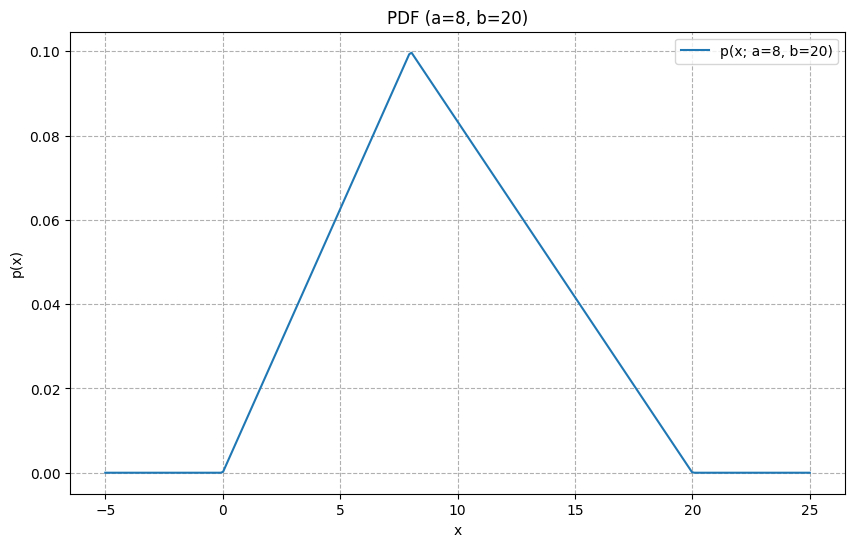

In [2]:
# PDF definition
def pdf(x, a, b=b):

    if a <= 0 or a > b:
        # a must be in the range [0, b]
        if isinstance(x, np.ndarray):
            return np.zeros_like(x)
        else:
            return 0.0

    x = np.asarray(x)
    p = np.zeros_like(x, dtype=float)
    H = 2.0 / b

    # Case 1: 0 <= x <= a
    mask1 = (x >= 0) & (x <= a)
    if a > 0:
        p[mask1] = H * (x[mask1] / a)

    # Case 2: a < x <= b
    mask2 = (x > a) & (x <= b)
    if b - a > 0:
        p[mask2] = H * ((b - x[mask2]) / (b - a))
    elif a == b: # a=b
        #  Belongs to case 1
        pass

    return p

# --- Plot ---
a_test = 8 # Randomly choose

x_vals = np.linspace(-5, 25, 300)
y_vals = pdf(x_vals, a=a_test, b=b)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label=f'p(x; a={a_test}, b={b})')
plt.title(f'PDF (a={a_test}, b={b})')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True, linestyle='--')
plt.legend()
plt.show()

- **Question 7** How many sample points are there in the file? Let us call this number $n$ and plot an histogram of the data

Totally 100 data points in the file.
[ 6.69787293 13.41965333 10.0877695  16.90039196 17.38022455 13.29167114
 10.06390131 16.61769313  8.89947326 13.19370464]


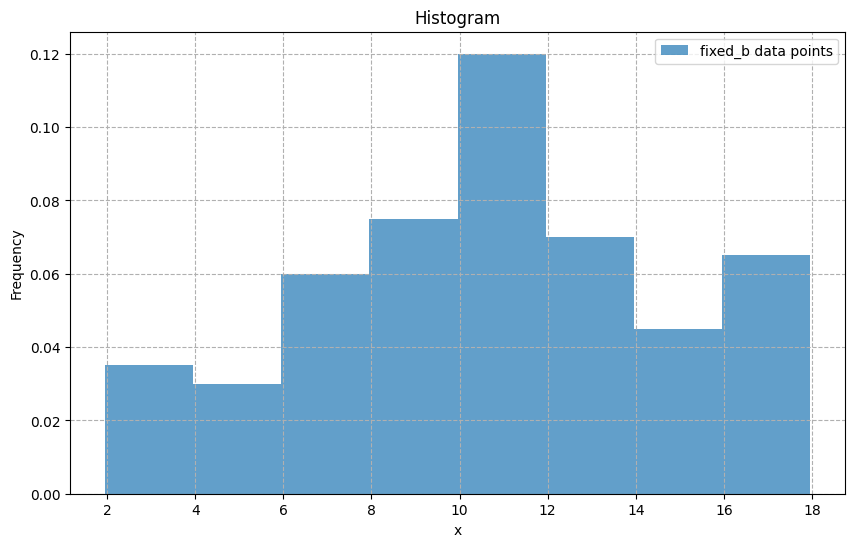

In [7]:
# Data points
n = len(data)
print(f"Totally {n} data points in the file.")
print(data[:10]) # Slicing to print 0 - 9

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins='auto', density=True, alpha=0.7, label='fixed_b data points')
plt.title('Histogram')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

- **Question 8.** Compute the empirical mean $\bar x$ and the empirical median $\bar m$.

In [4]:
x_bar = np.mean(data)
m_bar = np.median(data)

print(f"Empirical Mean (x_bar): {x_bar:.4f}")
print(f"Empirical Median (m_bar): {m_bar:.4f}")

Empirical Mean (x_bar): 10.7398
Empirical Median (m_bar): 10.7005


- **Question 9.** Use the expression of the expected value you computed above to find an estimator $\hat a_\text{mean}$ of the true parameter $a^\star$, as a function of the empirical mean $\bar x$. Repeat the same for the median, and find $\hat a_\text{median}$ as a function of the empirical median $\bar m$.

- **Q9 Answer**

  - Method of Moments is used. The expected values of empirical mean and median are calculated above. Then the calculated theoretical value (true mean which depends on $a$) equal to our observed empirical value from the data($\bar x$), and then solve for $a$.


  - Estimator based on the expected value $\hat a_\text{mean}$

    $$\mu = \mathbb{E}[X] = \frac{a+b}{3}$$
  - Let $\mu = \bar x$, and replace $a$ with $\hat a_\text{mean}$

    $$\bar x = \frac{\hat a_\text{mean} + b}{3}$$

  - Solve for $\hat a_\text{mean}$：

    $$3\bar x = \hat a_\text{mean} + b$$
    $$\hat a_\text{mean} = 3\bar x - 20$$



  - Same for the median

  $$m = \begin{cases} \sqrt{\frac{ab}{2}} & \text{if } 2a \ge b \\ b - \sqrt{\frac{b(b-a)}{2}} & \text{if } 2a < b \end{cases}$$

  - To find the estimator based on the median, again use the Method of Moments by setting the theoretical median $m$ equal to our empirical median $\bar m$. However, the formula for the theoretical median is piecewise, depending on whether $a$ is greater or less than $b/2$. This means our resulting estimator, $\hat a_\text{median}$, will also have a piecewise definition based on the value of $\bar m$.

  - First consider the case where $\bar m \ge b/2$, which corresponds to the theoretical condition $a \ge b/2$. In this scenario, the formula is $m = \sqrt{ab/2}$. By substituting $\bar m$ for $m$ and $\hat a_\text{median}$ for $a$, we get $\bar m = \sqrt{\hat a_\text{median} b/2}$. To solve for $\hat a_\text{median}$, we square both sides ($\bar m^2 = \hat a_\text{median} b/2$) and rearrange, giving the estimator $\hat a_\text{median} = 2\bar m^2 / b$.

  - Conversely, if we observe that $\bar m < b/2$, we use the other part of the median formula: $m = b - \sqrt{b(b-a)/2}$. Substituting our values gives $\bar m = b - \sqrt{b(b-\hat a_\text{median})/2}$. Solving this for $\hat a_\text{median}$ gives the estimator $\hat a_\text{median} = b - 2(b-\bar m)^2 / b$.


  - Final median estimator (with b=20):
  $$\hat a_\text{median} = \begin{cases} \frac{2\bar m^2}{20} = \frac{\bar m^2}{10} & \text{if } \bar m \ge 10 \\ 20 - \frac{2(20-\bar m)^2}{20} = 20 - \frac{(20-\bar m)^2}{10} & \text{if } \bar m < 10 \end{cases}$$


- **Question 10.** Implement a function `est_a_mean(x_bar, b=20)` and `est_a_median(m_bar, b=20)` that code the estimators you found above. What are the vaules of $\hat a_\text{mean}$ and $\hat a_\text{median}$ for the data you have in the file `fixed_b.npy`?

In [5]:
def est_a_mean(x_bar, b=b):

    return 3 * x_bar - b

def est_a_median(m_bar, b=b):

    if m_bar >= b / 2.0:
        return 2 * (m_bar**2) / b
    else:
        return b - 2 * ((b - m_bar)**2) / b

a_hat_mean = est_a_mean(x_bar, b=b)
a_hat_median = est_a_median(m_bar, b=b)

print(f"Estimate based on mean (a_hat_mean):    {a_hat_mean:.4f}")
print(f"Estimate based on median (a_hat_median): {a_hat_median:.4f}")

Estimate based on mean (a_hat_mean):    12.2193
Estimate based on median (a_hat_median): 11.4501


 - **Question 11.** Consider the log-likelihood function $\mathbb{L}(a;\{x_i\}_{i\in[1,n]},b=20)$. Plot the log-likelihood function as a function of $a$ for the data in the file `fixed_b.npy`.

 $$\widehat{\lambda}_{ML}=argmax_{\lambda}\prod_i P(x_i|\lambda)=argmax_{\lambda}\left(\sum_i\log(P(x_i|\lambda))\right)$$

<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-2351785290.py:21: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(a_vals, ll_vals, label='$\mathcal{L}(a)$')
/tmp/ipython-input-2351785290.py:22: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Log-Likelihood Function $\mathcal{L}(a)$ (b=20)')


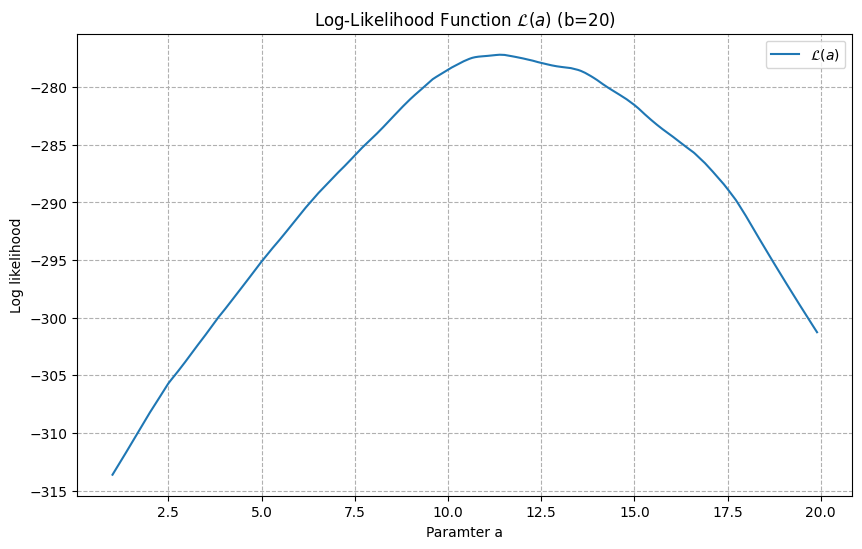

In [6]:
def loglh(a, data, b=b):
    # the same mehthod in TP2
    if a <= 0 or a >= b:
        return -np.inf

    logl = 0.0
    for x_i in data:
        p_i = pdf(x_i, a, b)

        # dataset is impossible
        if p_i == 0:
            return -np.inf

        logl += np.log(p_i)
    return logl

a_vals = np.linspace(1, 19.9, 1000)
ll_vals = [loglh(a, data, b=b) for a in a_vals]

plt.figure(figsize=(10, 6))
plt.plot(a_vals, ll_vals, label='$\mathcal{L}(a)$')
plt.title('Log-Likelihood Function $\mathcal{L}(a)$ (b=20)')
plt.xlabel('Paramter a')
plt.ylabel('Log likelihood')
plt.grid(True, linestyle='--')
plt.legend()
plt.show()


 - **Question 12.** What is the maximum likelihood estimator $\hat a_\text{MLE}$?

Maximum Likelihood Estimate (a_hat_mle): 11.3676
a_MLE (From optimizer): 11.36579655


/tmp/ipython-input-632416950.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  a = float(a_single_value)


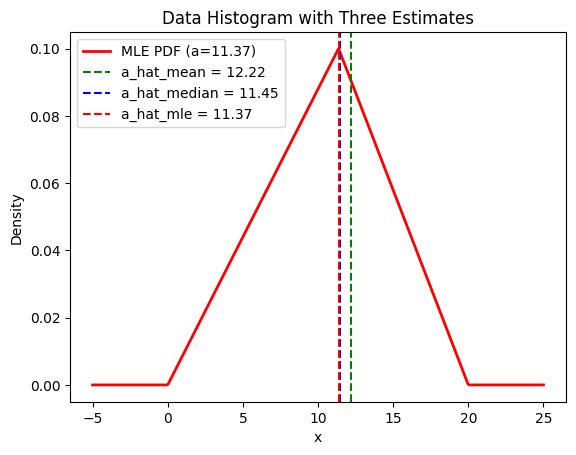

In [17]:
from scipy.optimize import minimize

# Method 1
# Find the index of the maximum value in ll_vals
max_ll_index = np.argmax(ll_vals)

# Find the corresponding a value
a_hat_mle = a_vals[max_ll_index]

print(f"Maximum Likelihood Estimate (a_hat_mle): {a_hat_mle:.4f}")

# Method 2 : optimizer
def negative_log_likelihood(a_single_value, data, b):
    a = float(a_single_value)

    ll = loglh(a, data, b)

    # Return negative value
    return -ll


# Scipy

initial_guess = a_hat_median
epsilon = 1e-9
bounds = [(epsilon, b - epsilon)]

result = minimize(
    negative_log_likelihood,
    x0=initial_guess,
    args=(data, b),
    bounds=bounds,
    method='L-BFGS-B'
)

if result.success:
    a_hat_mle_optimized = result.x[0]
    print(f"a_MLE (From optimizer): {a_hat_mle_optimized:.8f}")
else:
    print("\n optimization failed！")
    print(result.message)

# Plot the estimated PDF
plt.plot(x_vals, pdf(x_vals, a_hat_mle, b), 'r-', lw=2, label=f'MLE PDF (a={a_hat_mle:.2f})')
plt.axvline(a_hat_mean, color='g', linestyle='--', label=f'a_hat_mean = {a_hat_mean:.2f}')
plt.axvline(a_hat_median, color='b', linestyle='--', label=f'a_hat_median = {a_hat_median:.2f}')
plt.axvline(a_hat_mle, color='r', linestyle='--', label=f'a_hat_mle = {a_hat_mle:.2f}')

plt.title('Data Histogram with Three Estimates')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

- **Question 13.** Use bootstrapping to compute the 95% confidence interval for all the three $a$ estimators computed above.

In [18]:
def est_a_median_vectorized(m_bar, b=b):
    return np.where(
        m_bar >= b / 2.0, # calculates for all elements
        2 * (m_bar**2) / b,
        b - 2 * ((b - m_bar)**2) / b
    )

n_bootstraps = 10000
boot_data = [] # Store different Bootstrap samples from 'data'
boot_a_mean = []
boot_a_median = []
boot_a_mle = []

n = len(data)

np.random.seed(123)

print(f"Start {n_bootstraps} Bootstrap iterations")

boot_data = np.random.choice(data, (n_bootstraps,n))

# x_mean
x_bar_boot = np.mean(boot_data, axis=1)
boot_a_mean = est_a_mean(x_bar_boot, b)

# x_median
m_bar_boot = np.median(boot_data, axis=1)
boot_a_median = est_a_median_vectorized(m_bar_boot, b)


# MLE (Minimum Distance Estimation)
boot_data_sorted = np.sort(boot_data, axis=1)

#    Pre-compute the target k/n values. Shape: (n,)
k_vals = np.arange(1, n + 1)
target_vals = b * k_vals / n

#    Find differences.
diffs = np.abs(boot_data_sorted - target_vals)

best_k_idx = np.argmin(diffs, axis=1)
row_indices = np.arange(n_bootstraps) # [0, 1, 2, ..., 4999]
boot_a_mle = boot_data_sorted[row_indices, best_k_idx]

print("Bootstrap complete!")

# Calculate confidence intervals
ci_mean = np.percentile(boot_a_mean, [2.5, 97.5])
ci_median = np.percentile(boot_a_median, [2.5, 97.5])
ci_mle = np.percentile(boot_a_mle, [2.5, 97.5])

print(f"--- 95% Confidence Intervals ---")
print(f"a_hat_mean:   {a_hat_mean:.4f}, CI: [{ci_mean[0]:.4f}, {ci_mean[1]:.4f}]")
print(f"a_hat_median: {a_hat_median:.4f}, CI: [{ci_median[0]:.4f}, {ci_median[1]:.4f}]")
print(f"a_hat_mle:    {a_hat_mle:.4f}, CI: [{ci_mle[0]:.4f}, {ci_mle[1]:.4f}]")

Start 10000 Bootstrap iterations
Bootstrap complete!
--- 95% Confidence Intervals ---
a_hat_mean:   12.2193, CI: [9.8868, 14.5568]
a_hat_median: 11.4501, CI: [9.9447, 13.2823]
a_hat_mle:    11.3676, CI: [9.8570, 13.9666]


- **Question 14.** Compute the Fisher information of $a$ under the distribution $p(x;a,b=20)$.

- **Q14 Answer**
  $$
  S(x,\lambda)=\partial_\lambda L(x|\lambda),
  $$

  $$
  I(\lambda)=\mathbb{E}_{\lambda}[S(x|\lambda)^2].
  $$

    - In this problem
  $$I(a) = \mathbb{E} \left[ \left( \frac{\partial \log p(X; a)}{\partial a} \right)^2 \right]$$

    - Log-Likelihood:
  $$\log p(x; a, b) = \log(H) + \begin{cases} \log(x/a) & \text{if } 0 \le x \le a \\ \log((b-x)/(b-a)) & \text{if } a < x \le b \end{cases}$$


  - Derivative of the PDF:
  $$\frac{\partial \log p(x; a)}{\partial a} = \begin{cases} -1/a & \text{if } 0 \le x \le a \\ 1/(b-a) & \text{if } a < x \le b \end{cases}$$


  $$\left( \frac{\partial \log p}{\partial a} \right)^2 = \begin{cases} 1/a^2 & \text{if } 0 \le x \le a \\ 1/(b-a)^2 & \text{if } a < x \le b \end{cases}$$

  - Calculate the Expectation $I(a):
  $$I(a) = \int_{0}^{b} \left( \frac{\partial \log p}{\partial a} \right)^2 p(x; a, b) \, dx$

  $$I(a) = \int_{0}^{a} \left( \frac{1}{a^2} \right) p(x) \, dx + \int_{a}^{b} \left( \frac{1}{(b-a)^2} \right) p(x) \, dx$$

  - This can be seen as:
    $$I(a) = \frac{1}{a^2} \cdot F(a) + \frac{1}{(b-a)^2} \cdot (1 - F(a))$$

      * $F(a) = \frac{a^2}{ab} = \frac{a}{b}$.(the CDF from Question 3)
      * $1 - F(a) = 1 - \frac{a}{b} = \frac{b-a}{b}$.

  - After substitution:
    $$I(a) = \frac{1}{a^2} \left( \frac{a}{b} \right) + \frac{1}{(b-a)^2} \left( \frac{b-a}{b} \right)=\frac{1}{a(b-a)}$$


  - For $n$ independent and identically distributed (i.i.d.) samples, the total Fisher information is $I_n(a) = n \cdot I(a) = \frac{n}{a(b-a)}$. When $b=20$:
$$I_n(a) = \frac{n}{a(20-a)}$$


- **Question 15.** Can you compute the maximum likelihood estimator using the Jeffrey Posterior $\hat a_\text{jeff}$? Provide also the confidence intervals.

Jeffreys Posterior Estimate (a_hat_jeff): 11.3676
Jeffreys 95% Credible Interval: [9.7409, 13.9478]


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21518 (\N{CJK UNIFIED IDEOGRAPH-540E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39564 (\N{CJK UNIFIED IDEOGRAPH-9A8C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27010 (\N{CJK UNIFIED IDEOGRAPH-6982}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from font(s) DejaVu Sans.
  fig.canvas

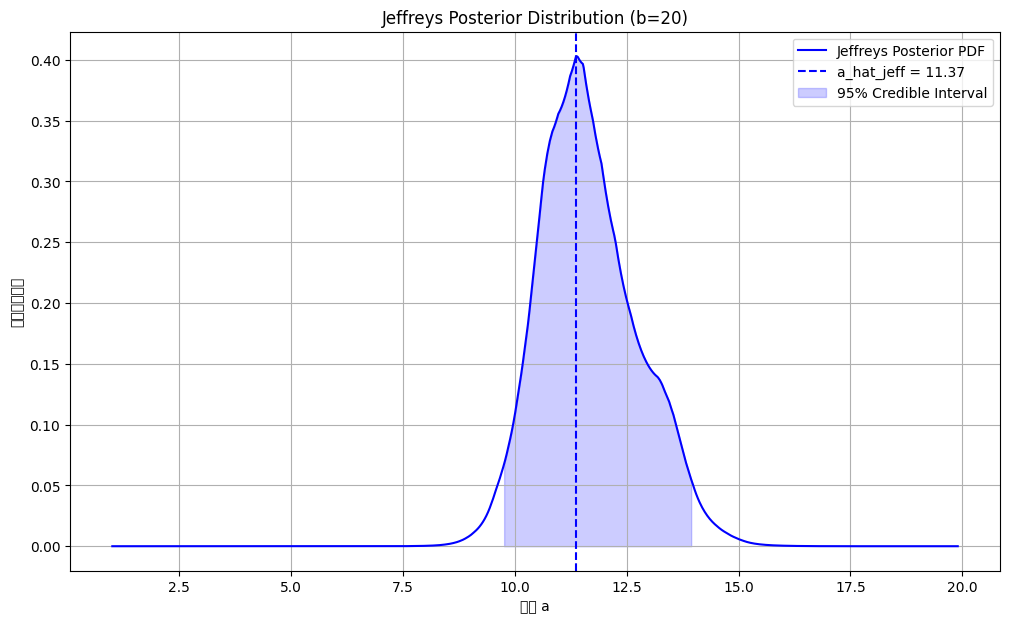

In [24]:
# --- Corrected Q15 Code ---

# --- FIX 1: Import the new function name ---
from scipy.integrate import cumulative_trapezoid, trapezoid
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt

# b=20
# a_vals and ll_vals must have been computed in Q11
# (Assuming ll_vals is already in your notebook's memory)

# 1. Calculate the log-posterior
log_prior_vals = -0.5 * np.log(a_vals) - 0.5 * np.log(b - a_vals)
log_posterior_vals = ll_vals + log_prior_vals

# 2. Find the posterior mode (MAP estimate)
a_hat_jeff = a_vals[np.argmax(log_posterior_vals)]

print(f"Jeffreys Posterior Estimate (a_hat_jeff): {a_hat_jeff:.4f}")

# 3. Calculate the credible interval
# 3.1 Convert log-posterior to posterior PDF (and normalize)
posterior_pdf_unnorm = np.exp(log_posterior_vals - np.max(log_posterior_vals))

# Use trapezoid (as fixed before)
area = trapezoid(posterior_pdf_unnorm, a_vals)
posterior_pdf = posterior_pdf_unnorm / area

# 3.2 Calculate the posterior CDF
# --- FIX 2: Call the new function name ---
posterior_cdf = cumulative_trapezoid(posterior_pdf, a_vals, initial=0)
posterior_cdf = posterior_cdf / posterior_cdf[-1] # Ensure the CDF ends at 1

# 3.3 Invert the CDF (using interpolation)
inv_cdf_func = interp1d(posterior_cdf, a_vals)
ci_jeff_low = inv_cdf_func(0.025)
ci_jeff_high = inv_cdf_func(0.975)

print(f"Jeffreys 95% Credible Interval: [{ci_jeff_low:.4f}, {ci_jeff_high:.4f}]")

# 4. Plotting
plt.figure(figsize=(12, 7))
plt.plot(a_vals, posterior_pdf, 'b-', label='Jeffreys Posterior PDF')
plt.axvline(a_hat_jeff, color='b', linestyle='--', label=f'a_hat_jeff = {a_hat_jeff:.2f}')
plt.fill_between(a_vals, posterior_pdf,
                 where=(a_vals >= ci_jeff_low) & (a_vals <= ci_jeff_high),
                 color='blue', alpha=0.2, label='95% Credible Interval')
plt.title('Jeffreys Posterior Distribution (b=20)')
plt.xlabel('参数 a')
plt.ylabel('后验概率密度')
plt.legend()
plt.grid(True)
plt.show()
# # b=20
# # a_vals 和 ll_vals 来自 Q11
# # 1. 计算对数后验
# # log p(a) = -0.5 * log(a) - 0.5 * log(b-a)
# log_prior_vals = -0.5 * np.log(a_vals) - 0.5 * np.log(B_KNOWN - a_vals)
# log_posterior_vals = ll_vals + log_prior_vals

# # 2. 找到后验众数 (MAP 估计)
# a_hat_jeff = a_vals[np.argmax(log_posterior_vals)]

# print(f"Jeffreys 后验估计 (a_hat_jeff): {a_hat_jeff:.4f}")

# # 3. 计算可信区间
# # 3.1 将对数后验转换为后验 PDF（进行归一化）
# #     通过减去最大值来避免 exp(大数) 溢出
# posterior_pdf_unnorm = np.exp(log_posterior_vals - np.max(log_posterior_vals))
# #     使用梯形法则 (trapz) 进行数值积分来归一化
# area = np.trapz(posterior_pdf_unnorm, a_vals)
# posterior_pdf = posterior_pdf_unnorm / area

# # 3.2 计算后验 CDF (累积积分)
# posterior_cdf = cumtrapz(posterior_pdf, a_vals, initial=0)
# posterior_cdf = posterior_cdf / posterior_cdf[-1] # 确保 CDF 最终为 1

# # 3.3 反转 CDF (使用插值)
# inv_cdf_func = interp1d(posterior_cdf, a_vals)
# ci_jeff_low = inv_cdf_func(0.025)
# ci_jeff_high = inv_cdf_func(0.975)

# print(f"Jeffreys 95% 可信区间: [{ci_jeff_low:.4f}, {ci_jeff_high:.4f}]")

# # 4. 绘图比较
# plt.figure(figsize=(12, 7))
# plt.plot(a_vals, posterior_pdf, 'b-', label='Jeffreys Posterior PDF')
# plt.axvline(a_hat_jeff, color='b', linestyle='--', label=f'a_hat_jeff = {a_hat_jeff:.2f}')
# plt.fill_between(a_vals, posterior_pdf,
#                  where=(a_vals >= ci_jeff_low) & (a_vals <= ci_jeff_high),
#                  color='blue', alpha=0.2, label='95% Credible Interval')
# plt.title('Jeffreys 后验分布 (b=20)')
# plt.xlabel('参数 a')
# plt.ylabel('后验概率密度')
# plt.legend()
# plt.grid(True)
# plt.show()

All the estimation you derived couldn't find the secret code with absolute certainty. The confidence intervals you computed are too large to produce one single code. Moreover your friend is a bit paranoid and changes the code every week, so the information you have is not valid anymore. You need to find a better way to estimate the code.

### Test the estimators
You are still trying to sneak into your friend's computer to get new samples of the distribution. In the meanwhile, you want to test the estimators you derived on a synthetic dataset. Florent gave you this Python function to sample the distribution $p(x;a,b)$:


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sample(a: float, b: float, size: int=1) -> np.array:
    def sample_single(a: float, b: float) -> float:
        u = 0
        v = b
        while not((u <= a and v <= 2/(a*b)*u) or (u > a and v <= 2/b *(b-u)/(b-a))):
            u = np.random.uniform(0, b)
            v = np.random.uniform(0, 2/b)
        return u
    return np.array([sample_single(a, b) for _ in range(size)])

- **Bonus question 1** The sampling function is not efficient. Can you provide a more efficient way to sample the distribution?

Stick with the case where $b=20$, and sample $N=1000$ points from the distribution $p(x;a,b)$ for 10 values of $a\in[0,20]$.
- **Question 16.** Compute and plot the mean squared error of the 4 estimators for $\hat a_\text{mean}, \hat a_\text{median}, \hat a_\text{ML}$ and $\hat a_\text{Jeff}$, as well as the Cramér-Rao lower bound. Which one is the best? [Hint: to have a good estimate of the mean squared error, you can repeat the sampling 300 times and compute the average of the squared error, for each value of $a$; be patient, this will take some time to compute]

- **Bonus Question 2.** Why is the Jeffrey's prior estimator so bad? Can you provide a better bound for the variance of the estimator? [Hint: you might need `np.gradient` to solve this question, and increase the number of different values of $a$ to get a finer plot]

### Joint estimation case
You finally managed to get the file `full.npy` with the samples of the distribution $p(x;a,b)$ your friend Alex stored in the computer. You don't know the value of $b$, and you need to estimate both $a^\star$ and $b^\star$. (BE CAREFUL: $a^\star$ is different from the previous case).



- **Question 17.** How many sample points are there in the file? Let us call this number $n$ and plot an histogram of the data.

- **Question 18.** Compute the maximum likelihood estimators $\hat a_\text{ML}$ and $\hat b_\text{ML}$ for the data in the file `full.npy`.


- **Question 19.** Can you provide the confidence intervals for the estimators? Can you guess the secret code of your friend?

- **Bonus Question 3.** Can you find some estimators for $a$ and $b$ that are based on mean and median? Do you expect them to work well? Why?